# Loading and Preprocessing

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import os

In [2]:
files = os.listdir('archive')

for file in files:
    print(file)

comments.csv
videos-stats.csv


In [3]:
comments_df = pd.read_csv('archive/comments.csv')
videos_df = pd.read_csv('archive/videos-stats.csv')

In [4]:
# Basic information about comments dataset
print("=== COMMENTS DATASET ===")
print("\nShape:", comments_df.shape)
print("\nColumns:", list(comments_df.columns))
print("\nData Types:")
print(comments_df.dtypes)
print("\nFirst few rows:")
print(comments_df.head())
print("\nMissing values:")
print(comments_df.isnull().sum())
print("\n" + "="*50 + "\n")

=== COMMENTS DATASET ===

Shape: (18409, 5)

Columns: ['Unnamed: 0', 'Video ID', 'Comment', 'Likes', 'Sentiment']

Data Types:
Unnamed: 0      int64
Video ID       object
Comment        object
Likes         float64
Sentiment     float64
dtype: object

First few rows:
   Unnamed: 0     Video ID                                            Comment  \
0           0  wAZZ-UWGVHI  Let's not forget that Apple Pay in 2014 requir...   
1           1  wAZZ-UWGVHI  Here in NZ 50% of retailers don’t even have co...   
2           2  wAZZ-UWGVHI  I will forever acknowledge this channel with t...   
3           3  wAZZ-UWGVHI  Whenever I go to a place that doesn’t take App...   
4           4  wAZZ-UWGVHI  Apple Pay is so convenient, secure, and easy t...   

   Likes  Sentiment  
0   95.0        1.0  
1   19.0        0.0  
2  161.0        2.0  
3    8.0        0.0  
4   34.0        2.0  

Missing values:
Unnamed: 0    0
Video ID      0
Comment       1
Likes         0
Sentiment     0
dtype: int64




In [5]:
# Basic information about videos dataset
print("=== VIDEOS DATASET ===")
print("\nShape:", videos_df.shape)
print("\nColumns:", list(videos_df.columns))
print("\nData Types:")
print(videos_df.dtypes)
print("\nFirst few rows:")
print(videos_df.head())
print("\nMissing values:")
print(videos_df.isnull().sum())

=== VIDEOS DATASET ===

Shape: (1881, 8)

Columns: ['Unnamed: 0', 'Title', 'Video ID', 'Published At', 'Keyword', 'Likes', 'Comments', 'Views']

Data Types:
Unnamed: 0        int64
Title            object
Video ID         object
Published At     object
Keyword          object
Likes           float64
Comments        float64
Views           float64
dtype: object

First few rows:
   Unnamed: 0                                              Title     Video ID  \
0           0  Apple Pay Is Killing the Physical Wallet After...  wAZZ-UWGVHI   
1           1                    The most EXPENSIVE thing I own.  b3x28s61q3c   
2           2                 My New House Gaming Setup is SICK!  4mgePWWCAmA   
3           3  Petrol Vs Liquid Nitrogen | Freezing Experimen...  kXiYSI7H2b0   
4           4                     Best Back to School Tech 2022!  ErMwWXQxHp0   

  Published At Keyword    Likes  Comments      Views  
0   2022-08-23    tech   3407.0     672.0   135612.0  
1   2022-08-24    tech 

In [6]:
# Basic statistics for numerical columns in videos dataset
print("\nNumerical Statistics for Videos Dataset:")
print(videos_df.describe())


Numerical Statistics for Videos Dataset:
        Unnamed: 0         Likes       Comments         Views
count  1881.000000  1.879000e+03    1879.000000  1.879000e+03
mean    940.000000  1.700610e+05    7863.331559  1.161292e+07
std     543.142247  7.962293e+05   37879.964926  1.084450e+08
min       0.000000 -1.000000e+00      -1.000000  2.500000e+01
25%     470.000000  2.672500e+03     199.000000  8.451500e+04
50%     940.000000  1.478700e+04     814.000000  5.917210e+05
75%    1410.000000  6.090600e+04    3377.500000  2.804978e+06
max    1880.000000  1.644556e+07  732818.000000  4.034122e+09


In [7]:
def clean_youtube_data(videos_df, comments_df):
    """
    Clean and prepare YouTube data for analysis.
    """
    # Make copies to avoid modifying original data
    clean_videos_df = videos_df.copy()
    clean_comments_df = comments_df.copy()
    
    # Clean Videos DataFrame
    # Handle missing values
    clean_videos_df.dropna(subset=['Title', 'Video ID', 'Published At'], inplace=True)
    
    # Replace -1 values in numeric columns
    numeric_cols = ['Views', 'Likes', 'Comments']
    for col in numeric_cols:
        clean_videos_df[col] = clean_videos_df[col].replace(-1, np.nan)
        clean_videos_df[col] = clean_videos_df[col].fillna(clean_videos_df[col].median())
    
    # Convert to appropriate data types
    clean_videos_df['Views'] = clean_videos_df['Views'].astype('float64')
    clean_videos_df['Likes'] = clean_videos_df['Likes'].astype('float64')
    clean_videos_df['Comments'] = clean_videos_df['Comments'].astype('float64')
    
    # Convert Published At to datetime
    clean_videos_df['Published At'] = pd.to_datetime(clean_videos_df['Published At'])
    
    # Remove any videos with zero views (to avoid division by zero in engagement rate)
    clean_videos_df = clean_videos_df[clean_videos_df['Views'] > 0]
    
    # Sort by publish date
    clean_videos_df.sort_values('Published At', inplace=True)
    
    # Reset index
    clean_videos_df.reset_index(drop=True, inplace=True)
    
    # Clean Comments DataFrame
    # Handle missing values
    clean_comments_df.dropna(subset=['Comment', 'Video ID'], inplace=True)
    
    # Clean sentiment scores
    clean_comments_df['Sentiment'] = clean_comments_df['Sentiment'].fillna(1.0)
    
    # Convert likes to numeric, handling any errors
    clean_comments_df['Likes'] = pd.to_numeric(clean_comments_df['Likes'], errors='coerce')
    clean_comments_df['Likes'] = clean_comments_df['Likes'].fillna(0)
    
    # Reset index
    clean_comments_df.reset_index(drop=True, inplace=True)
    
    # Print cleaning summary
    print("=== Data Cleaning Summary ===")
    print("\nVideos Dataset:")
    print(f"Original rows: {len(videos_df)}")
    print(f"Cleaned rows: {len(clean_videos_df)}")
    print(f"Removed rows: {len(videos_df) - len(clean_videos_df)}")
    
    print("\nComments Dataset:")
    print(f"Original rows: {len(comments_df)}")
    print(f"Cleaned rows: {len(clean_comments_df)}")
    print(f"Removed rows: {len(comments_df) - len(clean_comments_df)}")
    
    # Print data quality summary
    print("\nVideos Dataset Quality Check:")
    print("Missing values:")
    print(clean_videos_df.isnull().sum())
    print("\nData types:")
    print(clean_videos_df.dtypes)
    
    print("\nComments Dataset Quality Check:")
    print("Missing values:")
    print(clean_comments_df.isnull().sum())
    print("\nData types:")
    print(clean_comments_df.dtypes)
    
    return clean_videos_df, clean_comments_df

In [8]:
clean_videos_df, clean_comments_df = clean_youtube_data(videos_df, comments_df)

=== Data Cleaning Summary ===

Videos Dataset:
Original rows: 1881
Cleaned rows: 1881
Removed rows: 0

Comments Dataset:
Original rows: 18409
Cleaned rows: 18408
Removed rows: 1

Videos Dataset Quality Check:
Missing values:
Unnamed: 0      0
Title           0
Video ID        0
Published At    0
Keyword         0
Likes           0
Comments        0
Views           0
dtype: int64

Data types:
Unnamed: 0               int64
Title                   object
Video ID                object
Published At    datetime64[ns]
Keyword                 object
Likes                  float64
Comments               float64
Views                  float64
dtype: object

Comments Dataset Quality Check:
Missing values:
Unnamed: 0    0
Video ID      0
Comment       0
Likes         0
Sentiment     0
dtype: int64

Data types:
Unnamed: 0      int64
Video ID       object
Comment        object
Likes         float64
Sentiment     float64
dtype: object


# Visualizations

In [9]:
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd

In [50]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Nicko\AppData\Roaming\nltk_data...


True

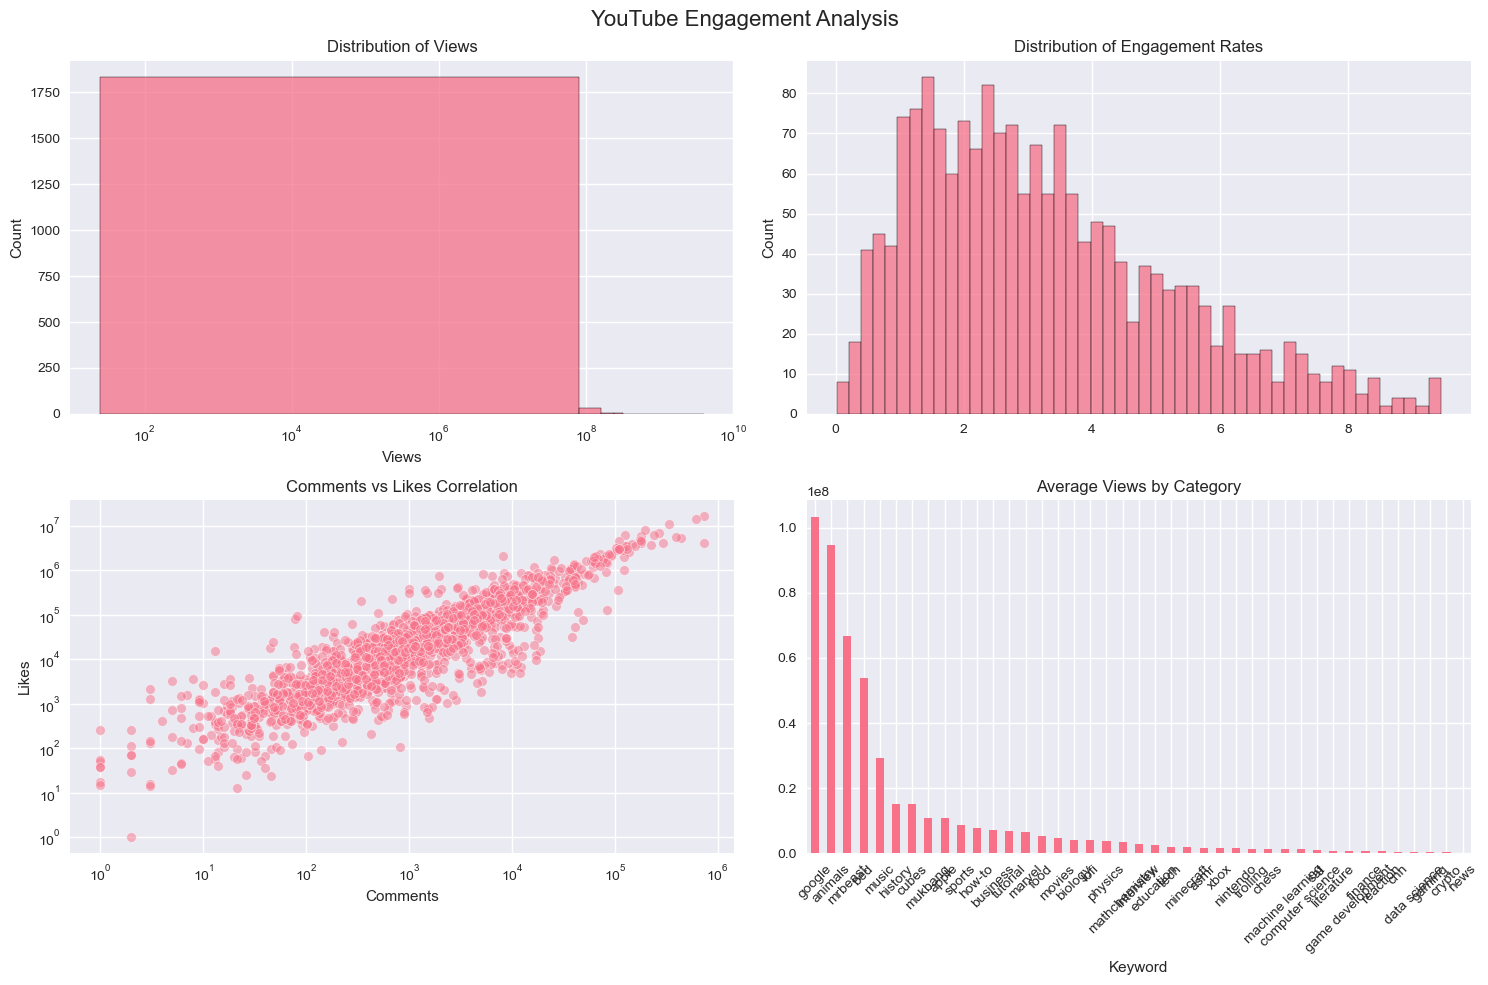

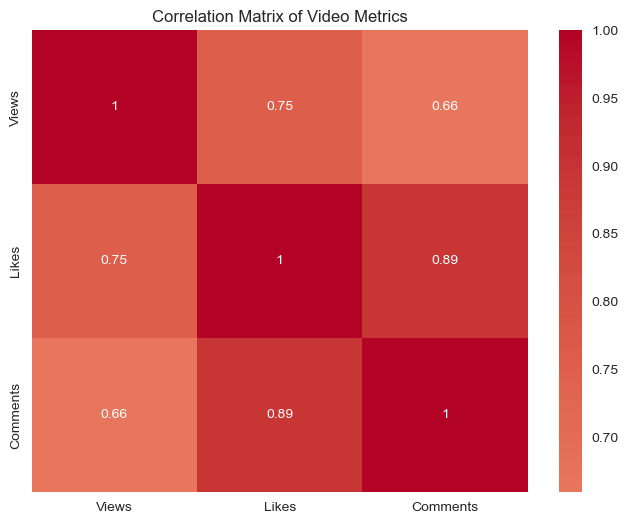

In [23]:
def plot_engagement_insights(videos_df):
    """
    Plot key engagement metrics and relationships
    """
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('YouTube Engagement Analysis', fontsize=16)

    # Views Distribution
    sns.histplot(data=videos_df, x='Views', bins=50, ax=axes[0,0])
    axes[0,0].set_title('Distribution of Views')
    axes[0,0].set_xscale('log')

    # Engagement Rate Distribution
    engagement_rate = ((videos_df['Likes'] + videos_df['Comments']) / videos_df['Views'] * 100)
    sns.histplot(data=engagement_rate[engagement_rate < engagement_rate.quantile(0.95)], 
                bins=50, ax=axes[0,1])
    axes[0,1].set_title('Distribution of Engagement Rates')

    # Comments vs Likes Scatter
    sns.scatterplot(data=videos_df, x='Comments', y='Likes', alpha=0.5, ax=axes[1,0])
    axes[1,0].set_title('Comments vs Likes Correlation')
    axes[1,0].set_xscale('log')
    axes[1,0].set_yscale('log')

    # Category Performance (if available)
    if 'Keyword' in videos_df.columns:
        avg_views = videos_df.groupby('Keyword')['Views'].mean().sort_values(ascending=False)
        avg_views.plot(kind='bar', ax=axes[1,1])
        axes[1,1].set_title('Average Views by Category')
        axes[1,1].tick_params(axis='x', rotation=45)
    else:
        axes[1,1].remove()

    plt.tight_layout()
    plt.show()

def plot_correlation_matrix(videos_df):
    """
    Plot correlation matrix of key metrics
    """
    # Select relevant numeric columns
    numeric_cols = ['Views', 'Likes', 'Comments']
    corr_matrix = videos_df[numeric_cols].corr()

    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix of Video Metrics')
    plt.show()

# Usage example:
# After your data cleaning
plot_engagement_insights(clean_videos_df)
plot_correlation_matrix(clean_videos_df)

In [54]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_upload_day_month_vs_engagement(clean_videos_df):
    """
    Plot upload day/month vs engagement based on the cleaned videos dataset.
    
    Args:
    clean_videos_df (DataFrame): Cleaned videos dataframe with 'Published At', 
                                 'Views', 'Likes', 'Comments'.
    """
    # Create day and month columns
    clean_videos_df['Upload Day'] = clean_videos_df['Published At'].dt.day_name()
    clean_videos_df['Upload Month'] = clean_videos_df['Published At'].dt.month_name()
    
    # Calculate engagement rate (e.g., (Likes + Comments) / Views)
    clean_videos_df['Engagement Rate'] = (clean_videos_df['Likes'] + clean_videos_df['Comments']) / clean_videos_df['Views']
    
    # Aggregate data by day and month
    day_group = clean_videos_df.groupby('Upload Day')['Engagement Rate'].mean().reindex([
        'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
    ])
    month_group = clean_videos_df.groupby('Upload Month')['Engagement Rate'].mean().reindex([
        'January', 'February', 'March', 'April', 'May', 'June', 
        'July', 'August', 'September', 'October', 'November', 'December'
    ])
    
    # Plot engagement rate by day
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    day_group.plot(kind='bar', color='skyblue')
    plt.title('Engagement Rate by Upload Day')
    plt.xlabel('Day of the Week')
    plt.ylabel('Engagement Rate')
    plt.xticks(rotation=45)
    
    # Plot engagement rate by month
    plt.subplot(1, 2, 2)
    month_group.plot(kind='bar', color='orange')
    plt.title('Engagement Rate by Upload Month')
    plt.xlabel('Month')
    plt.ylabel('Engagement Rate')
    plt.xticks(rotation=45)
    
    # Show the plots
    plt.tight_layout()
    plt.show()

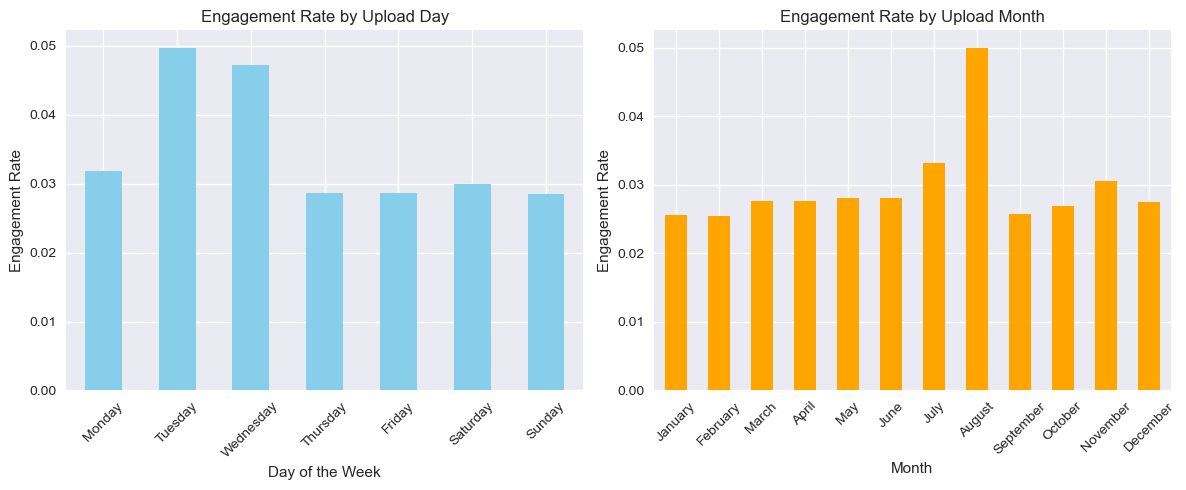

In [56]:
plot_upload_day_month_vs_engagement(clean_videos_df)

# Model Training

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [67]:
class ContentStrategyAnalyzer:
    def __init__(self, videos_df, comments_df):
        self.videos_df = videos_df.copy()
        self.comments_df = comments_df.copy()
        self.sentiment_analyzer = SentimentIntensityAnalyzer()
        self.engagement_model = None
        self.prepare_date_features()
        self.train_engagement_model()

    def prepare_date_features(self):
        """Extract date-based features."""
        try:
            self.videos_df['Published At'] = pd.to_datetime(self.videos_df['Published At'], errors='coerce')
            self.videos_df['day_of_week'] = self.videos_df['Published At'].dt.dayofweek
            self.videos_df['month'] = self.videos_df['Published At'].dt.month
            self.videos_df['year'] = self.videos_df['Published At'].dt.year
        except Exception as e:
            print(f"Error in preparing date features: {e}")

    def train_engagement_model(self):
        """Train and validate the engagement prediction model."""
        try:
            # Calculate engagement rate
            self.videos_df['engagement_rate'] = np.where(
                self.videos_df['Views'] > 0,
                (self.videos_df['Likes'] + self.videos_df['Comments']) / self.videos_df['Views'] * 100,
                0
            )
            self.videos_df['engagement_rate'].replace([np.inf, -np.inf], np.nan, inplace=True)
            self.videos_df['engagement_rate'].fillna(self.videos_df['engagement_rate'].median(), inplace=True)

            # Handle outliers using IQR method
            Q1 = self.videos_df['engagement_rate'].quantile(0.25)
            Q3 = self.videos_df['engagement_rate'].quantile(0.75)
            IQR = Q3 - Q1

            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Clip values to the bounds
            self.videos_df['engagement_rate'] = self.videos_df['engagement_rate'].clip(lower=lower_bound, upper=upper_bound)

            # Prepare features
            features = ['day_of_week', 'month', 'year']
            X = self.videos_df[features]
            y = self.videos_df['engagement_rate']

            # Split data
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
            self.engagement_model = RandomForestRegressor(n_estimators=100, random_state=42)
            self.engagement_model.fit(X_train, y_train)

            # Evaluate model
            self.train_score = self.engagement_model.score(X_train, y_train)
            self.test_score = self.engagement_model.score(X_test, y_test)
            self.cv_scores = cross_val_score(self.engagement_model, X, y, cv=5)

            # Feature importance
            self.feature_importance = pd.DataFrame({
                'feature': features,
                'importance': self.engagement_model.feature_importances_
            }).sort_values('importance', ascending=False)
        except Exception as e:
            print(f"Error in training engagement model: {e}")

    def predict_engagement(self, title, publish_date):
        """Predict engagement using date features and explain sentiment score."""
        try:
            # Extract features for the date
            features = pd.DataFrame({
                'day_of_week': [publish_date.weekday()],
                'month': [publish_date.month],
                'year': [publish_date.year]
            })

            # Predict engagement rate
            predicted_engagement = self.engagement_model.predict(features)[0]

            # Analyze sentiment of the title
            sentiment = self.sentiment_analyzer.polarity_scores(title)

            # Identify words contributing to negative sentiment
            negative_words = [word for word in title.split() if self.sentiment_analyzer.polarity_scores(word)['neg'] > 0]

            # Create explanation if sentiment score is negative
            sentiment_explanation = "No major negative words detected."
            if sentiment['neg'] > 0.2:  # Threshold for "noteworthy" negative sentiment
                sentiment_explanation = f"The following words may have contributed to the negative sentiment: {', '.join(negative_words)}"

            return {
                'predicted_engagement': predicted_engagement,
                'title_analysis': {
                    'length': len(title),
                    'has_question': '?' in title,
                    'has_exclamation': '!' in title,
                    'sentiment': sentiment,
                    'negative_words': negative_words,
                    'sentiment_explanation': sentiment_explanation
                },
                'timing': {
                    'day': publish_date.strftime('%A'),
                    'month': publish_date.strftime('%B'),
                    'year': publish_date.year
                }
            }
        except Exception as e:
            print(f"Error in predicting engagement: {e}")
            return None

    def plot_engagement_by(self, groupby_col, title, labels, subplot_position):
        """Helper function to plot engagement by a specified column."""
        try:
            engagement = self.videos_df.groupby(groupby_col)['engagement_rate'].mean()
            plt.subplot(subplot_position)
            sns.barplot(x=engagement.index, y=engagement.values)
            plt.title(title)
            plt.xticks(range(len(labels)), labels)
        except Exception as e:
            print(f"Error in plotting engagement: {e}")

    def plot_timing_analysis(self):
        """Plot engagement patterns by date components."""
        plt.figure(figsize=(15, 5))

        self.plot_engagement_by('day_of_week', 'Average Engagement by Day',
                                ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], 131)
        self.plot_engagement_by('month', 'Average Engagement by Month',
                                ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], 132)
        self.plot_engagement_by('year', 'Average Engagement by Year',
                                sorted(self.videos_df['year'].unique()), 133)

        plt.tight_layout()
        plt.show()

    def plot_model_performance(self):
        """Plot model validation results."""
        try:
            plt.figure(figsize=(15, 5))

            # Feature Importance
            plt.subplot(131)
            sns.barplot(data=self.feature_importance, x='feature', y='importance')
            plt.title('Feature Importance')
            plt.xticks(rotation=45)

            # Engagement Rate Distribution
            plt.subplot(132)
            sns.histplot(data=self.videos_df, x='engagement_rate', bins=30)
            plt.title('Engagement Rate Distribution')

            # Cross-validation Scores
            plt.subplot(133)
            sns.boxplot(data=pd.DataFrame({'Scores': self.cv_scores}))
            plt.title('Cross-validation Scores')
            plt.ylabel('R² Score')

            plt.tight_layout()
            plt.show()
        except Exception as e:
            print(f"Error in plotting model performance: {e}")

    def predict_and_visualize(self, title, publish_date):
        """Make prediction and create visualizations for the input."""
        prediction_results = self.predict_engagement(title, publish_date)
        if not prediction_results:
            return

        plt.figure(figsize=(15, 5))

        # Predicted engagement vs distribution
        plt.subplot(131)
        sns.histplot(data=self.videos_df, x='engagement_rate', bins=30)
        plt.axvline(prediction_results['predicted_engagement'], color='r', linestyle='--',
                    label=f'Prediction: {prediction_results["predicted_engagement"]:.2f}%')
        plt.title('Predicted Engagement vs Distribution')
        plt.legend()

        # Day of week comparison
        self.plot_engagement_by('day_of_week', 'Your Upload Day vs Average Engagement',
                                ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], 132)
        plt.axvline(publish_date.weekday(), color='r', linestyle='--',
                    label=f'Your day: {publish_date.strftime("%A")}')
        plt.legend()

        # Month comparison
        self.plot_engagement_by('month', 'Your Upload Month vs Average Engagement',
                                ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], 133)
        plt.axvline(publish_date.month - 1, color='r', linestyle='--',
                    label=f'Your month: {publish_date.strftime("%B")}')
        plt.legend()

        plt.tight_layout()
        plt.show()


In [70]:
# Modify the test_analyzer function to use the correct variable names
def test_analyzer():
    print("=== YouTube Content Strategy Analyzer ===")
    
    while True:
        try:
            title = input("Enter video title: ")
            date_str = input("Enter publish date (YYYY-MM-DD): ")
            
            # Parse date without time
            publish_date = pd.to_datetime(date_str)
            break
        except (ValueError, OutOfBoundsDatetime):
            print("Invalid date format. Please use YYYY-MM-DD")
    
    # Initialize and analyze with the correct variable names
    analyzer = ContentStrategyAnalyzer(clean_videos_df, clean_comments_df)  # Changed from videos_clean, comments_clean
    results = analyzer.predict_engagement(title, publish_date)
    
    print("\n=== Analysis Results ===")
    print("\nTitle Analysis:")
    print(f"Length: {results['title_analysis']['length']} characters")
    print(f"Question Mark: {'Yes' if results['title_analysis']['has_question'] else 'No'}")
    print(f"Exclamation Mark: {'Yes' if results['title_analysis']['has_exclamation'] else 'No'}")
    print(f"Sentiment Score: {results['title_analysis']['sentiment']['compound']:.2f}")
    
    # New: Display the negative words detected
    negative_words = results['title_analysis']['negative_words']
    print(f"Negative Words Detected: {', '.join(negative_words) if negative_words else 'None'}")
    
    # New: Display the explanation for the sentiment score
    sentiment_explanation = results['title_analysis']['sentiment_explanation']
    print(f"Explanation: {sentiment_explanation}")
    
    print("\nTiming Analysis:")
    print(f"Day: {results['timing']['day']}")
    print(f"Month: {results['timing']['month']}")
    
    print(f"\nPredicted Engagement Rate: {results['predicted_engagement']:.2f}%")
    
    print("\nGenerating visualizations...")
    analyzer.predict_and_visualize(title, publish_date)
    
    return analyzer, results


=== YouTube Content Strategy Analyzer ===
Enter video title: Nah I'd Win
Enter publish date (YYYY-MM-DD): 2024-12-12

=== Analysis Results ===

Title Analysis:
Length: 11 characters
Question Mark: No
Exclamation Mark: No
Sentiment Score: 0.53
Negative Words Detected: Nah
Explanation: The following words may have contributed to the negative sentiment: Nah

Timing Analysis:
Day: Thursday
Month: December

Predicted Engagement Rate: 3.45%

Generating visualizations...


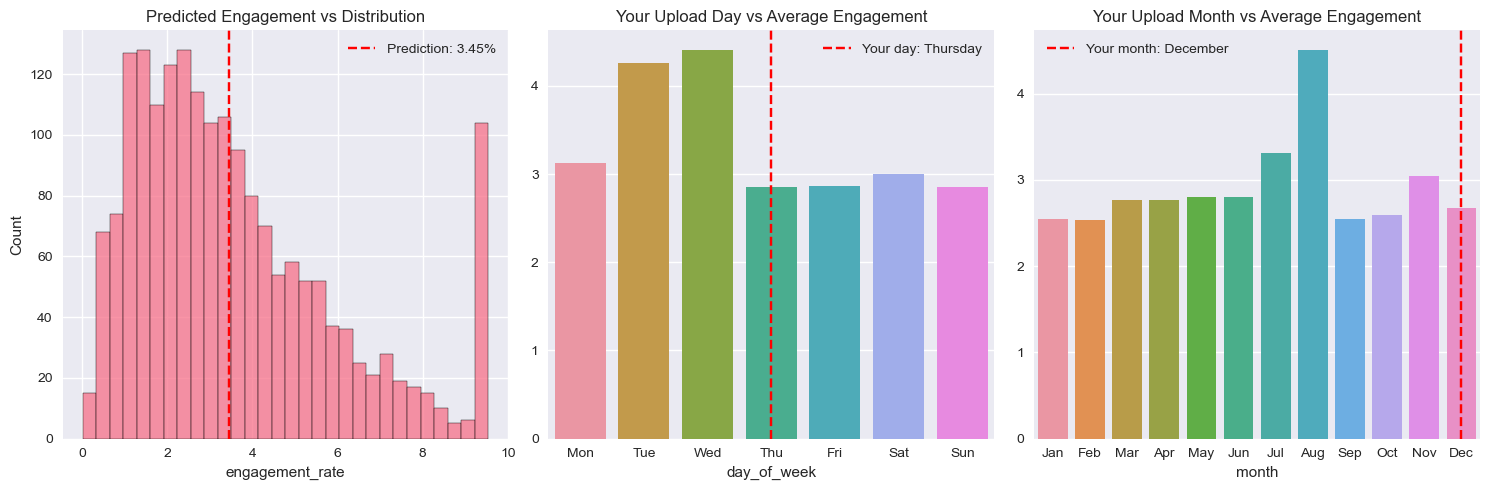

In [72]:
if __name__ == "__main__":
    analyzer, results = test_analyzer()